# Uber Rider Data Case Study

##  Project Overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users.

## Dataset Description

- city: city this user signed up in
    - city_King's Landing: this user signed up in *King's Landing*
    - city_Winteclfell: this user signed up in *Winteclfell*
    - city_Astapor: this user signed up in *Astapor*
- phone: primary device for this user
    - phone_Android: primary device for this user is Android
    - phone_iPhone: primary device for this user is iPhone
    - phone_no_phone: primary device for this user is unknown
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday
- churn: a user is regarded as churn if there is no trip made in last 30 days

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('cleaned_data.csv')

In [5]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn,active
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,0,100.0,0,1,0,0,1,0,0,1
49996,0.00,4.0,4.9,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,0,0.0,1,0,0,0,1,0,1,0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,1,100.0,0,0,1,1,0,0,1,0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,0,100.0,1,0,0,0,1,0,1,0
49999,3.49,5.0,4.9,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,0,0.0,1,0,0,1,0,0,1,0


## Define features and target

In [6]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winteclfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'

In [7]:
X = df[selected_features].values
y = df['churn'].values

In [8]:
X

array([[3.67, 5.  , 4.7 , ..., 0.  , 1.  , 0.  ],
       [8.26, 5.  , 5.  , ..., 1.  , 0.  , 0.  ],
       [0.77, 5.  , 4.3 , ..., 0.  , 1.  , 0.  ],
       ...,
       [3.86, 5.  , 5.  , ..., 1.  , 0.  , 0.  ],
       [4.58, 3.5 , 3.  , ..., 0.  , 1.  , 0.  ],
       [3.49, 5.  , 4.9 , ..., 1.  , 0.  , 0.  ]])

### Split data to train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l2')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

In [11]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [12]:
def get_peclformance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred > threshold),
                    precision_score(y_train, y_train_pred > threshold),
                    recall_score(y_train, y_train_pred > threshold),
                    f1_score(y_train, y_train_pred > threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred > threshold),
                    precision_score(y_test, y_test_pred > threshold),
                    recall_score(y_test, y_test_pred > threshold),
                    f1_score(y_test, y_test_pred > threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [13]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


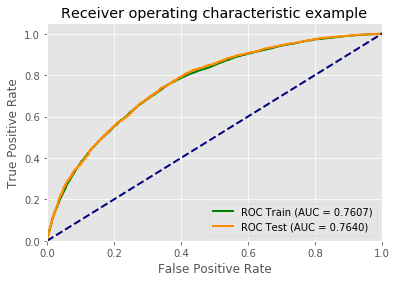

In [14]:
get_peclformance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Losgistic Regression: Grid Search (HyperParameter Tuning)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
 
lr = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2'],
              'n_jobs': ['-1'],
              'C': [1]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(lr, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

lr = grid_obj.best_estimator_

lr.fit(X_train, y_train)

C:\Users\WendyTsai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\WendyTsai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\WendyTsai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\WendyTsai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\WendyTsai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: '

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs='-1', penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


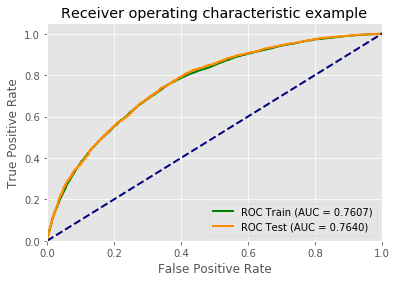

In [16]:
get_peclformance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Understand the estimated coefficients

In [17]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.659806
11,phone_Android,0.443715
3,avg_surge,0.198335
1,avg_rating_by_driver,0.145792
10,city_Winterfell,0.135279
2,avg_rating_of_driver,0.132317
0,avg_dist,0.035349
7,weekday_pct,0.000191
4,surge_pct,-0.004126
13,phone_no_phone,-0.049709


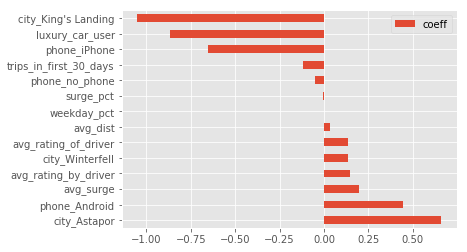

In [18]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Random Forest

In [19]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    get_peclformance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

              train      test
metrics                      
AUC        0.893662  0.856504
Accuracy   0.814400  0.787700
Precision  0.824547  0.802285
Recall     0.892243  0.876340
f1-score   0.857060  0.837679


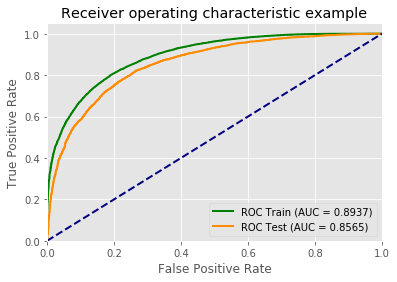

In [82]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': 100,
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)
clf.fit(X_train, y_train)

train_test_model(clf, X_train, y_train, X_test, y_test)

In [22]:
clf.feature_importances_

array([0.08257391, 0.16699012, 0.04066808, 0.10041509, 0.11298619,
       0.06690983, 0.05654068, 0.13304742, 0.03335452, 0.09702658,
       0.02272811, 0.04936126, 0.03705759, 0.00034062])

### Random Forest: Grid Search (HyperParameter Tuning)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
 
clf = RandomForestClassifier()

param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25,30], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20, 5],
              'n_jobs':[-1]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.913716  0.857562
Accuracy   0.830325  0.787500
Precision  0.838718  0.804098
Recall     0.901223  0.872660
f1-score   0.868848  0.836977


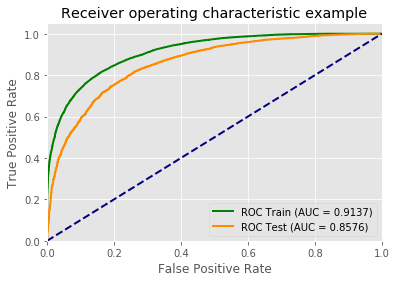

In [25]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Plot Feature Importances

Text(0.5,0,'Relative Importance')

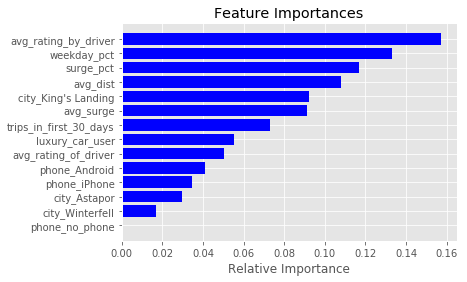

In [72]:
clf_importances = clf.feature_importances_
indices = np.argsort(clf_importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), clf_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [selected_features[ind] for ind in indices])
plt.xlabel('Relative Importance')

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.873381  0.861511
Accuracy   0.802925  0.792700
Precision  0.821706  0.811234
Recall     0.873522  0.871061
f1-score   0.846822  0.840083


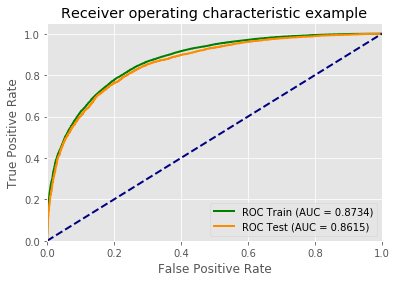

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

clf = GradientBoostingClassifier(**parameters)

train_test_model(clf, X_train, y_train, X_test, y_test)

### Gradient Boosting Trees: Grid Search (HyperParameter Tuning)

In [31]:
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier()

param_grid = {'n_estimators': [40, 50, 60, 70, 80, 100],
              'max_depth': [3, 5, 8, 10],
              'learning_rate': [0.1, 0.2, 0.3, 0.4],
              'random_state': [40]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=40, subsample=1.0, verbose=0,
              warm_start=False)

              train      test
metrics                      
AUC        0.888099  0.863172
Accuracy   0.816300  0.792500
Precision  0.832659  0.810992
Recall     0.882862  0.871061
f1-score   0.857026  0.839954


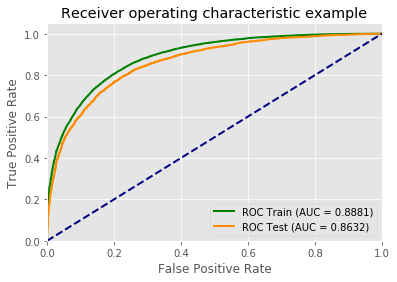

In [32]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Decision: Use Gradient Boosting Trees

In [74]:
def get_peclformance_metrics_forecast(y, y_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values = [roc_auc_score(y, y_pred),
                    accuracy_score(y, y_pred > threshold),
                    precision_score(y, y_pred > threshold),
                    recall_score(y, y_pred > threshold),
                    f1_score(y, y_pred > threshold)
                   ]

    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'forecast':metric_values},columns=['metrics','forecast']).set_index('metrics')
    print(all_metrics)    

In [83]:
def plot_roc_curve_forecast(y, y_pred):
    roc_auc = roc_auc_score(y, y_pred)
    fpr, tpr, _ = roc_curve(y, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='green',
             lw=lw, label='ROC (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [84]:
def forecast_model(clf, X, y):
    clf.fit(X,y)
    
    y_pred = clf.predict(X)
    p_pred = clf.predict_proba(X)[:,1]
    
    get_peclformance_metrics_forecast(y, p_pred)
    plot_roc_curve_forecast(y, p_pred)

           forecast
metrics            
AUC        0.885520
Accuracy   0.813240
Precision  0.830661
Recall     0.880081
f1-score   0.854657


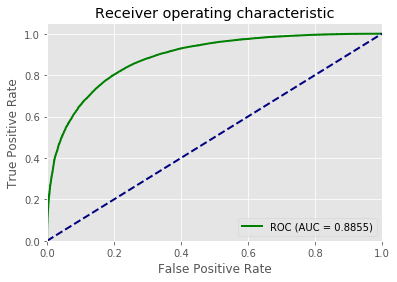

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 40
}

clf = GradientBoostingClassifier(**parameters)

forecast_model(clf, X, y)

### Predict Churn rate

In [88]:
y_pred = clf.predict(X)

In [90]:
sum(y_pred == 0) / (sum(y_pred == 0) + sum(y_pred == 1))

0.33896